### Projeto 1, Ciência dos Dados - Davi Dom Bosco Silva

___

#  Índice de Desenvolvimento Humano, Índice de Percepção de Corrupção e Score Democrático

#### Pergunta a ser investigada: Necessariamente países mais atentos à corrupção e mais democráticos tendem a ter um alto IDH?

A fim de compreender os fênomenos por trás de tais parâmetros e de suas respectivas interrelações, faz-se necessário estreitar os dados a um período específico. Uma vez que os comportamentos obtidos por tal intervalo forem detalhadamente apurados, uma análise temporal comparativa torna-se indispensável, pois se é necessário concluir se as correlações são de fato uma tendência, ou tão somente uma característica singular do período analisado.

Desta forma, por disponibilizar um número considerável de dados em todas as variáveis a serem utilizadas, o ano de 2011 foi escolhido como base para a análise inicial. 

Fonte dos dados: https://www.gapminder.org/:

##### ❯ Importação de Bibliotecas

In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

##### ❯ Comandos iniciais: abertura de tabelas, separação de períodos específicos e cruzamento de tabelas.

In [2]:
hdi1 = pd.read_excel('hdi_human_development_index.xlsx') 
corruption = pd.read_excel('corruption_perception_index_cpi_pre2012.xlsx')
democracy = pd.read_excel('democracy_score_use_as_color.xlsx')

hdi_2011 = hdi1.loc[:, ["geo", 2011]] 
hdi = hdi_2011.set_index('geo')

corruption_2011 = corruption.loc[:, ["geo", 2011]] 
corrup = corruption_2011.set_index('geo')

democracy_2011 = democracy.loc[:, ["geo", 2011]]
democ= democracy_2011.set_index('geo')

pretabela1 = hdi.join(corrup, how='inner', lsuffix='_hdi', rsuffix='_corrup')
pretabela2 = hdi.join(democ, how='inner', lsuffix='_hdi', rsuffix='_democ')
pretabela3 = democ.join(corrup, how='inner', lsuffix='_democ', rsuffix='_corrup')

tabela = pretabela1.join(democ, how='inner')

#writer = pd.ExcelWriter('Projeto1.xlsx')
#tabela.to_excel(writer,'Sheet1')
#writer.save()

tabelajoined= pd.read_excel('Projeto1.xlsx')
tabelajoined.isnull().any()
tabelajoined_exp_notnull = tabelajoined[~tabelajoined["2011_democracyscore"].isnull()]
tabela_limpa = tabelajoined_exp_notnull[~tabelajoined_exp_notnull["2011_corrup"].isnull()]
tabela_limpa.rename(columns={"geo":"Países","2011_hdi":"IDH","2011_corrup":"Índice de Percepção de Corrupção","2011_democracyscore":"Score Democrático"},inplace=True)
tabela_clean = tabela_limpa.set_index('Países')

C:\Users\david\.anaconda\anaconda_tentativa_2\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


##### ❯ Tabela cruzada de dados - 2011 - tendo como índices os próprios países e como colunas os parâmetros desejados.

In [3]:
tabela_clean.head()

,IDH,Índice de Percepção de Corrupção,Score Democrático
Países,,,
Albania,0.752,3.05,9.0
Algeria,0.732,2.90,2.0
Angola,0.508,2.01,-2.0
Argentina,0.822,3.00,8.0
Armenia,0.732,2.63,5.0


## l. Análise individual de parâmetros

### IDH


O Índice de Desenvolvimento Humano é uma medida que foi criada pelo "Programa das Nações Unidas para o Desenvolvimento" a fim de estimar o nível de desenvolvimento de diferentes localidades. Tal índice, leva em consideração quesitos como educação, renda e expectativa de vida.

Assim, em uma escala de 0 a 1, são considerados mais desenvolvidos os países com IDH próximos à 1 e menos desenvolvidos aqueles mais próximos à 0.

##### ❯ Análise descritiva e Histograma

count    157.000000
mean       0.676433
std        0.162439
min        0.331000
25%        0.534000
50%        0.706000
75%        0.812000
max        0.941000
Name: IDH, dtype: float64

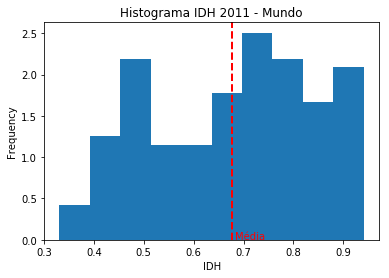

In [4]:
plot = tabela_clean["IDH"].plot.hist(density=True);

def verticalLine(plot, x, y, color, nome):
    plot.axvline(x, color=color, linestyle="dashed", linewidth=2)
    plot.text(1.01*x, y, nome, color=color) 

verticalLine(plot, tabela_clean["IDH"].mean(), 0.01, "r", "Média")
plt.xlabel("IDH")
plt.title("Histograma IDH 2011 - Mundo")

tabela_clean["IDH"].describe()

Os dados revelam que o valor da mediana do IDH excede sutilmente o valor de sua média, o que nos leva à concluir que  mais de 50% dos países possuiam em 2011 um IDH acima da média (0.676433). Tal comportamento, por sua vez, pôde ser notado no histograma acima, uma vez que houve uma leve cauda (assimetria) à esquerda da distribuição de frequências.

##### ❯ Boxplot

Text(0.5,1,'IDH 2011')

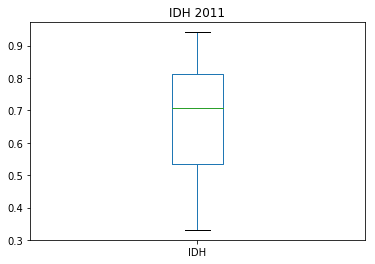

In [5]:
tabela_clean["IDH"].plot.box()
plt.title('IDH 2011')

Quanto à dispersão, o desvio padrão observado é de aproximadamente 0.16 em relação à média e o IQ é de 0.278.

### Índice de Percepção de Corrupção

O Índice de Percepção de Corrupção (IPC) é uma listagem publicada anualmente pela Transparência Internacional, que rankeia os países conforme "o grau em que a corrupção é percebida a existir entre os funcionários públicos e políticos".

Logo, uma pontuação elevada diz respeito a um alto nível de transparência, da mesma forma que uma baixa pontuação relaciona-se à baixa percepção da sociedade quanto à deturpação de vias cívicas. Até o ano de 2011, utilizava-se uma escala de 0 a 10.

##### ❯ Análise descritiva e Histograma

count    157.000000
mean       3.912803
std        2.056143
min        1.490000
25%        2.460000
50%        3.050000
75%        4.620000
max        9.460000
Name: Índice de Percepção de Corrupção, dtype: float64

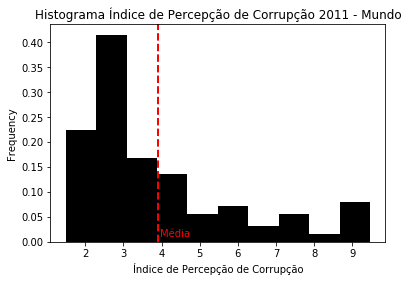

In [6]:
plot = tabela_clean["Índice de Percepção de Corrupção"].plot.hist(density=True, color="black");

verticalLine(plot, tabela_clean["Índice de Percepção de Corrupção"].mean(), 0.01, "r", "Média")
plt.xlabel("Índice de Percepção de Corrupção")
plt.title("Histograma Índice de Percepção de Corrupção 2011 - Mundo")

tabela_clean["Índice de Percepção de Corrupção"].describe()

As informações acima plotadas nos dão uma noção quanto ao cenário global no quesito IPC. Ressalva-se que a média computada foi cerca de 3.9, com uma mediana de 3.05. Além disso, percebe-se uma assimetria acentuada à direita e um - consideravelmente alto - desvio padrão de 2.05.

Logo, percebe-se que na maioria dos países, os cidadãos não têm amplo conhecimento quanto aos desvios de conduta ocorridos em seus respectivos âmbitos publico-políticos.

##### ❯ Boxplot

Text(0.5,1,'Índice de Percepção de Corrupção 2011')

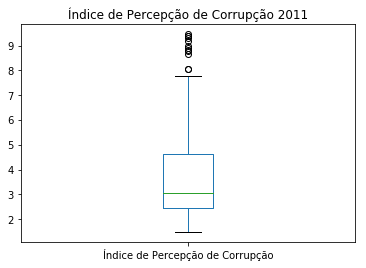

In [7]:
tabela_clean["Índice de Percepção de Corrupção"].plot.box()
plt.title('Índice de Percepção de Corrupção 2011')

O fato do desvio padrão ser alto, em conjuntura à perceptível presença de "outliers", ou "dados desconexos" no boxplot anterior nos reafirma a crítica situação enfrentada mundialmente no quesito corrupção. Isto é, caso não fosse a presença de pouquíssimos países (em suma, europeus) com elevado IPC, a média não seria deslocada positivamente, e consequentemente apresentaria um valor ainda menor que o notado em 2011. 

### Score Democrático

O Score Democrático é uma pontuação baseada no conjunto de dados do "Polity IV Project", a qual é calculada subtraindo-se a pontuação de autocracia de um país de sua respectiva pontuação de democracia. Ele basicamente mede a natureza democrática e livre dos países. Nesta escala, -10 é o valor mais baixo (tendendo ao autoritarismo) e 10 o mais alto (tendendo à plena democracia).

##### ❯ Análise descritiva e Histograma

count    157.000000
mean       4.165605
std        6.096286
min      -10.000000
25%       -1.000000
50%        7.000000
75%        9.000000
max       10.000000
Name: Score Democrático, dtype: float64

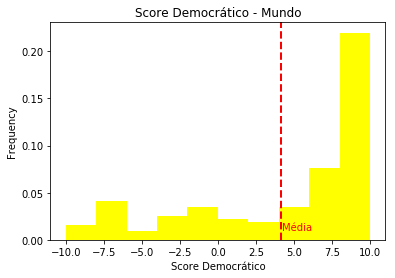

In [8]:
plot = tabela_clean["Score Democrático"].plot.hist(density=True, color="yellow");
verticalLine(plot, tabela_clean["Score Democrático"].mean(), 0.01, "r", "Média")
plt.xlabel("Score Democrático")
plt.title("Score Democrático - Mundo")

tabela_clean["Score Democrático"].describe()

  Com base no histograma e na análise descritiva da coluna "Score Democrático", percebe-se que dentre os países compreendidos pela tabela, em 2011, a maior fatia deles encontrava-se em um regime democrático. Tal conclusão pode ser gerada, uma vez que a média aritmética das pontuações possui valor positivo (aproximadamente 4.16). Em concordância com esse comportamento, encontra-se o fato de que a mediana do gráfico possui um alto valor positivo (7), maior do que a própria média. De maneira explícita, o fênomeno pode ser notado através da assimetria que o histograma apresenta à esquerda.

## ll. Análise Índice de Percepção de Corrupção x Score Democrático

Antes de analisar as correlações entre IDH e os parâmetros que talvez o influenciem, neste bloco será analisado se os parâmetros em si possuem uma interrelação.

##### ❯ Gráfico de Dispersão e Boxplots

Coeficiente de correlação linear: 0.3594123132302077


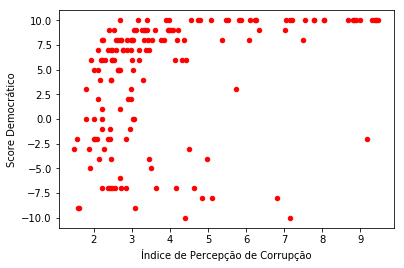

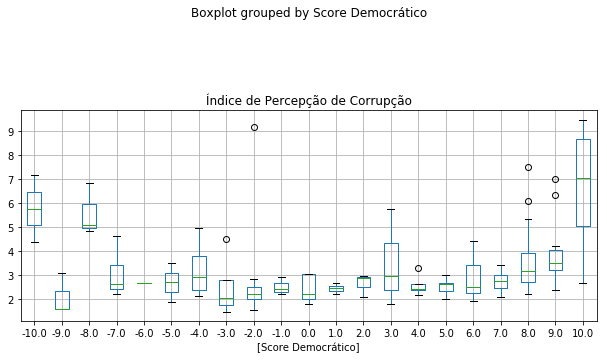

In [35]:
tabela_clean.plot.scatter(x="Índice de Percepção de Corrupção", y="Score Democrático", color="red");

x = tabela_clean["Índice de Percepção de Corrupção"].corr(tabela_clean["Score Democrático"])
print ("Coeficiente de correlação linear:", x)

tabela_clean.loc[:,['Índice de Percepção de Corrupção','Score Democrático']].boxplot(by='Score Democrático',layout=(4,1),figsize=(10,18));

Tanto o gráfico de dispersão quanto os boxplots no sugerem que Score Democrático e Índice de Percepção de Corrupção não possuem associação direta entre si. Observa-se que tanto existem países totalmente autoritários com IPC acima da média, quanto existem países com considerável score democrático e baíxissimo IPC. 

Reafirmando tal proposição, encontra-se o coeficiente de correlação linear entre os parâmetros, o qual apresenta um ínfimo valor de aproximadamente 0.36.

## lll. Análise Índice de Percepção de Corrupção x Índice de Desenvolvimento Humano

No intuito de responder a questão proposta, primeiramente analisaremos se há associação entre IDH e o Índice de Percepção de Corrupção.

##### ❯ Gráfico de dispersão e Correlação

Coeficiente de correlação linear: 0.7045425189877721


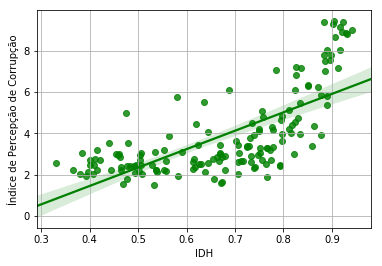

In [10]:
sns.regplot(tabela_clean["IDH"],tabela_clean["Índice de Percepção de Corrupção"], color=('green'))
plt.grid()
x = tabela_clean["IDH"].corr(tabela_clean["Índice de Percepção de Corrupção"])
print ("Coeficiente de correlação linear:", x)

O gráfico de dispersão acima exposto, permite a conclusão, mesmo que superficial, de que há sim uma tendência diretamente proporcional entre as variáveis. Ao ser analisado o respectivo coeficiente de correlação linear, corrobora-se a ideia de países mais "transparentes" tendem a possuir um maior IDH. Tal correlação equivale a aproximadamente 0.7, sendo que o máximo que um coeficiente de tal natureza pode obter é 1.

##### ❯ Gráfico de Barras - Distribuição de intervalos

Text(0.5,1,'IPC x IDH')

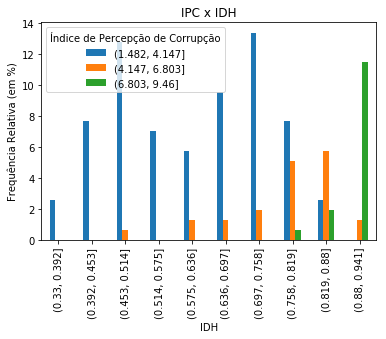

In [11]:
sessoeshdi1 = pd.cut(tabela_clean["IDH"], bins=10)
sessoeshdi = sessoeshdi1.value_counts(sort=False, normalize=True)*100

sessoescorrup1 = pd.cut(tabela_clean["Índice de Percepção de Corrupção"], bins=3)
sessoescorrup = sessoescorrup1.value_counts(sort=False, normalize=True)*100

ct1 = pd.crosstab(sessoeshdi1, sessoescorrup1)
total=ct1.sum().sum()
ct2 = (ct1/total*100)
ct2.plot(kind='bar')
plt.ylabel('Frequência Relativa (em %)')
plt.title("IPC x IDH")

De modo visualmente mais compreensível, o gráfico de barras acima, tem representados três intervalos de IPC (azul para países com baixo índice, laranja para médio índice e verde para alto índice), os quais são dispostos de acordo com a frequência relativa que cada um desponta nos intervalos de IDH.

Nota-se que as duas menores faixas de IDH comportam tão somente países que possuem baixo nível de IPC, enquanto que somente as três maiores faixas de IDH possuem países com alto nível de IPC. A majoritaria parte dos países com alto índice de percepção de corrupção encontra-se no mais elevado intervalo de índice de desenvolvimento humano.

Logo, pode-se deduzir que quanto mais atenta for a população de um país quanto às práticas corruptivas de seus órgão públicos e políticos, maior tente a ser o seu IDH. Tal conclusão possui considerável coerência, uma vez que na prática, governos severamente "fiscalizados" por uma sociedade politicamente ativa tendem a de fato criar medidas públicas que gerem retorno à população. Tais medidas envolvem o aprimoramento da saúde, educação e economia nacional, áreas quais influenciam diretamente o cálculo do IDH. 

## lV. Análise Score Democrático x Índice de Desenvolvimento Humano

Para contestar a segunda parte da questão, este bloco tem a função de explorar o comportamento do IDH dos países em detrimento à seus scores democráticos.

##### ❯ Gráfico de Dispersão e Boxplots

Coeficiente de correlação linear: 0.31482383909279754


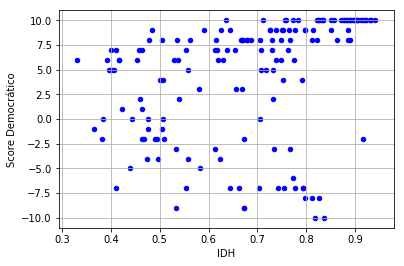

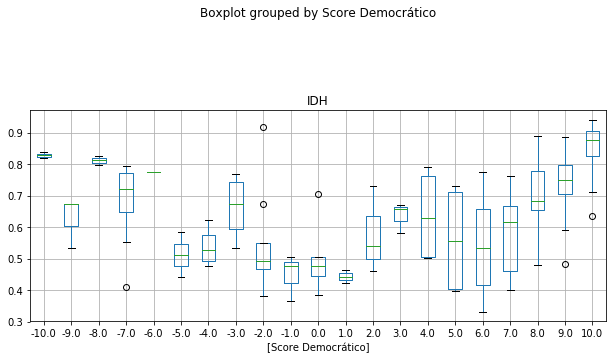

In [32]:
tabela_clean.plot.scatter(x="IDH", y="Score Democrático", color="blue");
plt.grid()
x = tabela_clean["IDH"].corr(tabela_clean["Score Democrático"])
print ("Coeficiente de correlação linear:", x)

tabela_clean.loc[:,['IDH','Score Democrático']].boxplot(by='Score Democrático',layout=(4,1),figsize=(10,18));

A análise do gráfico de dispersão e dos boxplots acima permite a dedução de um comportamento curioso: não somente países democráticos possuem altos IDHs. A premissa contrária também se prova verdadeira quando com scores democráticos positivos possuem um IDH abaixo da média.

Comprovando o que visualmente se induziu como inegável, o cálculo do coeficientede correlação linear apresentou um relativamente baixo módulo: apenas 0.315.

##### ❯ Gráfico de Barras - Distribuição de intervalos

Text(0.5,1,'Score democrático x IDH')

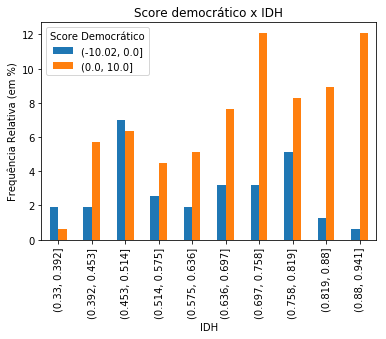

In [13]:
sessoeshdi1 = pd.cut(tabela_clean["IDH"], bins=10)
sessoeshdi = sessoeshdi1.value_counts(sort=False, normalize=True)*100

sessoesdemoc1 = pd.cut(tabela_clean["Score Democrático"], bins=2)
sessoesdemoc = sessoesdemoc1.value_counts(sort=False, normalize=True)*100

ct1 = pd.crosstab(sessoeshdi1, sessoesdemoc1)
total=ct1.sum().sum()
ct2 = (ct1/total*100)
ct2.plot(kind='bar')
plt.ylabel('Frequência Relativa (em %)')
plt.title("Score democrático x IDH")

Indo na contra-mão do senso comum, o gráfico de barras proveniente do cruzamento das tabelas IDH e Score Democrático, nos reafirma que os parâmetros em questão não são intrínsecamente correlacionados. Por instância, uma faixa de IDH específica [0.453 - 0.514] que encontra-se abaixo da média de IDH mundial, comporta relativamente mais países democráticos do que nações antidemocráticas. Semelhantemente, países com governos autoritários são consideravelmente encontrados em todas as faixas elevadas de IDH.  

Tal comportamento, embora contraintuitivo, prova-se coeso quando analisamos alguns casos específicos. A China por exemplo, embora esteja longe da plenitude democrática, possui um efervescente mercado economico, o qual influencia direta e positivamente seu IDH. 

Além disso, quando se trata de governos completamente autoritários, há sempre um certo resquício de dúvida no que tange à autenticidade dos dados estatísticos liberados pelo país, uma vez que estes podem ser diretamente adulterados pela censura do regime em questão.

## V. Análise Temporal

Já temos em mãos a resposta para nossa pergunta incial, mas será que a mesma lógica se aplica a demais períodos? Ou seria ela singularmente experienciada pelo ano de 2011?

Para analisar estas proposições, foram analisadas as mesmas associações paramétricas, porém nos anos de 2000 e 2005. Não  seria possível analisar anos acima de 2011, uma vez que a partir de 2012, o IPC adotou uma nova métrica de pontuação. Dessa forma, comparações gerariam conclusões dúbias.

##### ❯ Abertura de tabelas, separação de períodos adicionais e cruzamento de tabelas.

In [14]:
hdi_2000 = hdi1.loc[:, ["geo", 2000]] 
hdi2000 = hdi_2000.set_index('geo')

corruption_2000 = corruption.loc[:, ["geo", 2000]] 
corrup2000 = corruption_2000.set_index('geo')

democracy_2000 = democracy.loc[:, ["geo", 2000]]
democ2000= democracy_2000.set_index('geo')

pretabela4 = hdi2000.join(corrup2000, how='inner', lsuffix='_hdi', rsuffix='_corrup')

tabela2 = pretabela4.join(democ2000, how='inner')

tabela2.isnull().any()
tabelajoined_exp_notnull2 = tabela2[~tabela2[2000].isnull()]
tabela_limpa2 = tabelajoined_exp_notnull2[~tabelajoined_exp_notnull2["2000_corrup"].isnull()]
tabela_limpa2.rename(columns={"geo":"Países","2000_hdi":"IDH","2000_corrup":"Índice de Percepção de Corrupção",2000:"Score Democrático"},inplace=True)

hdi_2005 = hdi1.loc[:, ["geo", 2005]] 
hdi2005 = hdi_2005.set_index('geo')

corruption_2005 = corruption.loc[:, ["geo", 2005]] 
corrup2005 = corruption_2005.set_index('geo')

democracy_2005 = democracy.loc[:, ["geo", 2005]]
democ2005= democracy_2005.set_index('geo')

pretabela7 = hdi2005.join(corrup2005, how='inner', lsuffix='_hdi', rsuffix='_corrup')

tabela3 = pretabela7.join(democ2005, how='inner')

tabela3.isnull().any()
tabelajoined_exp_notnull3 = tabela3[~tabela3[2005].isnull()]
tabela_limpa3 = tabelajoined_exp_notnull3[~tabelajoined_exp_notnull3["2005_corrup"].isnull()]
tabela_limpa3.rename(columns={"2005_hdi":"IDH","2005_corrup":"Índice de Percepção de Corrupção",2005:"Score Democrático"},inplace=True)

C:\Users\david\.anaconda\anaconda_tentativa_2\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


### Relação IDH x Score Democrático ao longo dos anos

Correlação:   0.4871040824325354                         0.3761260051420083                       0.3594123132302077


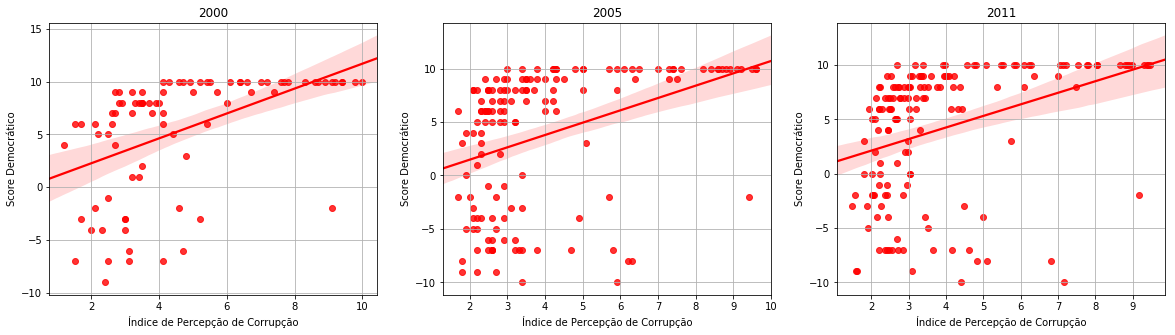

In [15]:
fig = plt.figure(figsize=(20, 5))
plt.subplot(131)
sns.regplot(tabela_limpa2["Índice de Percepção de Corrupção"],tabela_limpa2["Score Democrático"], color=('red'))
plt.grid()
plt.title("2000")

plt.subplot(132)
sns.regplot(tabela_limpa3["Índice de Percepção de Corrupção"],tabela_limpa3["Score Democrático"], color=('red'))
plt.grid()
plt.title("2005")

plt.subplot(133)
sns.regplot(tabela_clean["Índice de Percepção de Corrupção"],tabela_clean["Score Democrático"], color=('red'))
plt.grid()
plt.title("2011")

print("Correlação:  ", tabela_limpa2["Índice de Percepção de Corrupção"].corr(tabela_limpa2["Score Democrático"]),"                       ", tabela_limpa3["Índice de Percepção de Corrupção"].corr(tabela_limpa3["Score Democrático"]), "                     ",tabela_clean["Índice de Percepção de Corrupção"].corr(tabela_clean["Score Democrático"]) )


Conforme analisado na seção II, score democrático e IPC não são inerentemente correlacionados. A análise temporal permite a comprovação de que não há uma tendência concreta entre as variáveis.

Embora perceba-se que o coeficiente de correlação linear diminui ao longo dos anos, tal comportamento está mais atrelado ao fato de que a cada ano mais países foram analisados, e estes, por sua vez possuiam dados mais dispersos.

### Relação IDH x Índice de Percepção de Corrupção

Correlação:   0.7116485253696714                         0.7300221052042689                       0.7045425189877721


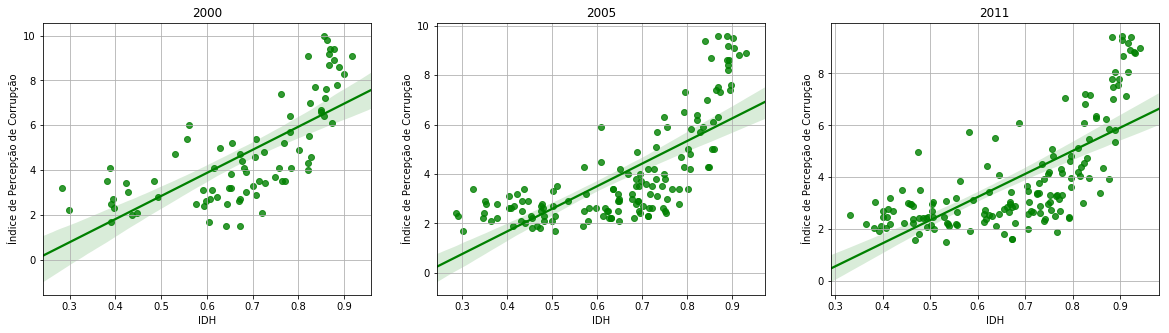

In [16]:
fig = plt.figure(figsize=(20, 5))
plt.subplot(131)
sns.regplot(tabela_limpa2["IDH"],tabela_limpa2["Índice de Percepção de Corrupção"], color=('green'))
plt.grid()
plt.title("2000")

plt.subplot(132)
sns.regplot(tabela_limpa3["IDH"],tabela_limpa3["Índice de Percepção de Corrupção"], color=('green'))
plt.grid()
plt.title("2005")

plt.subplot(133)
sns.regplot(tabela_clean["IDH"],tabela_clean["Índice de Percepção de Corrupção"], color=('green'))
plt.grid()
plt.title("2011")

print("Correlação:  ", tabela_limpa2["IDH"].corr(tabela_limpa2["Índice de Percepção de Corrupção"]),"                       ", tabela_limpa3["IDH"].corr(tabela_limpa3["Índice de Percepção de Corrupção"]), "                     ",tabela_clean["IDH"].corr(tabela_clean["Índice de Percepção de Corrupção"]) )


A correlação entre IDH e Índice de Percepção de Corrupção permanece consistente ao longo dos períodos analisados. Embora haja uma queda no índice de correlação, esta também pode ser justificada pelo fato de que cada vez mais países são analisados, e não que os mesmos países se tornaram mais dispersos com o decorrer dos anos.

### Relação IDH x Score Democrático

Correlação:   0.5668199209529768                         0.35399557180230407                         0.31482383909279754


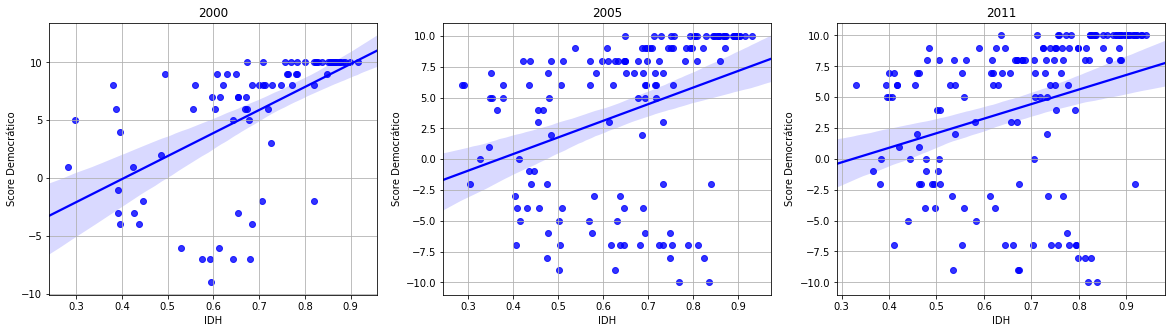

In [17]:
fig = plt.figure(figsize=(20, 5))
plt.subplot(131)
sns.regplot(tabela_limpa2["IDH"],tabela_limpa2["Score Democrático"], color=('blue'))
plt.grid()
plt.title("2000")

plt.subplot(132)
sns.regplot(tabela_limpa3["IDH"],tabela_limpa3["Score Democrático"], color=('blue'))
plt.grid()
plt.title("2005")

plt.subplot(133)
sns.regplot(tabela_clean["IDH"],tabela_clean["Score Democrático"], color=('blue'))
plt.grid()
plt.title("2011")

print("Correlação:  ", tabela_limpa2["IDH"].corr(tabela_limpa2["Score Democrático"]),"                       ", tabela_limpa3["IDH"].corr(tabela_limpa3["Score Democrático"]), "                       ",tabela_clean["IDH"].corr(tabela_clean["Score Democrático"]) )


Por fim, a análise temporal indica que a desassociação entre Score Democrático e IDH não é uma característica atribuída tão somente ao ano de 2011.

## VI. Conclusão


Após a análise do conjunto de dados estatísticos e retomando a questão inicial, pôde-se concluir que, de fato, o Índice de Percepção de Corrupção é diretamente associado ao IDH de um país. No entanto, o status democrático não necessariamente exerce influência na variável em questão. Isto é, um país com score democrático baixo pode muito bem pertencer a uma alta camada de IDH, assim como um país democraticamente elevado pode encontrar-se em um faixa relativamente baixa de IDH.

Dadas as inferências alcançadas pelo vigente projeto, prova-se que nem sempre há uma consonância entre a percepção do senso comum e o que se reflete na análise de dados estatísticos. 

Bibliografia:

    https://pt.wikipedia.org/wiki/%C3%8Dndice_de_Percep%C3%A7%C3%A3o_de_Corrup%C3%A7%C3%A3o
    https://brasilescola.uol.com.br/o-que-e/geografia/o-que-e-idh.htm
    